# EMPLOYEE ATTRITION  EXPLORATORY DATA  ANALYSIS

## AIM:-  
To understandthe concepts of business intelligence insights, by analysing the employee resignation behaiviour.

## Business Problem:-
The key to success in any organization is attracting and retaining top talent. As an HR analyst one of the key task is to determine which factors keep employees at the company and which prompt others to leave. Given in the data is a set of data points on the employees who are either currently working within the company or have resigned. The objective is to identify and improve these factors to prevent loss of good people.
Our goal is to provide a complete analysis about all the factors that has impact on employee’s resignation patterns, the current insights of the organisation and its employee demographics.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("employee_attrition.csv")

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0


In [4]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,893.000000,1002.000000,934.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.0,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
mean,37.930571,800.528942,9.930407,2.892128,1.0,1024.367347,2.683188,66.680272,2.713314,2.043732,2.712342,6449.796890,14250.629738,2.653061,15.260447,3.159378,2.689990,80.0,0.822157,11.196307,2.782313,2.748299,6.942663,4.215743,2.119534,4.005831
std,9.395978,408.109828,8.421791,1.053541,0.0,606.301635,1.096829,20.474094,0.710146,1.118918,1.096889,4794.525367,7088.757938,2.508186,3.665779,0.366206,1.077767,0.0,0.874662,7.857581,1.283401,0.697278,6.068322,3.658595,3.108651,3.522574
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,458.250000,2.000000,2.000000,1.0,496.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2814.000000,7950.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,37.000000,801.500000,8.000000,3.000000,1.0,1019.000000,3.000000,67.000000,3.000000,2.000000,3.000000,4735.000000,14295.000000,1.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,44.000000,1162.000000,16.000000,4.000000,1.0,1553.000000,4.000000,84.000000,3.000000,3.000000,4.000000,8446.000000,20392.000000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,60.000000,1496.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,893.0,37.930571,9.395978,18.0,31.00,37.0,44.0,60.0
DailyRate,1002.0,800.528942,408.109828,102.0,458.25,801.5,1162.0,1496.0
DistanceFromHome,934.0,9.930407,8.421791,1.0,2.00,8.0,16.0,29.0
Education,1029.0,2.892128,1.053541,1.0,2.00,3.0,4.0,5.0
EmployeeCount,1029.0,1.000000,0.000000,1.0,1.00,1.0,1.0,1.0
EmployeeNumber,1029.0,1024.367347,606.301635,1.0,496.00,1019.0,1553.0,2068.0
EnvironmentSatisfaction,1029.0,2.683188,1.096829,1.0,2.00,3.0,4.0,4.0
HourlyRate,1029.0,66.680272,20.474094,30.0,48.00,67.0,84.0,100.0
JobInvolvement,1029.0,2.713314,0.710146,1.0,2.00,3.0,3.0,4.0
JobLevel,1029.0,2.043732,1.118918,1.0,1.00,2.0,3.0,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       893 non-null    float64
 1   Attrition                 1029 non-null   object 
 2   BusinessTravel            1024 non-null   object 
 3   DailyRate                 1002 non-null   float64
 4   Department                1029 non-null   object 
 5   DistanceFromHome          934 non-null    float64
 6   Education                 1029 non-null   int64  
 7   EducationField            1029 non-null   object 
 8   EmployeeCount             1029 non-null   int64  
 9   EmployeeNumber            1029 non-null   int64  
 10  EnvironmentSatisfaction   1029 non-null   int64  
 11  Gender                    1029 non-null   object 
 12  HourlyRate                1029 non-null   int64  
 13  JobInvolvement            1029 non-null   int64  
 14  JobLevel

In [7]:
df.isnull().sum()

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

__Missing Value Treatment__

In [8]:
# Finding out the missing values in the Marital Status column
df[df["MaritalStatus"].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
10,40.0,No,Travel_Rarely,630.0,Sales,4.0,4,Marketing,1,215,3,Male,67,2,3,Sales Executive,4,NaN,10855,8552,7,Y,No,11,3,1,80,1,15,2,2,12,11,2,11
89,43.0,No,Travel_Rarely,1001.0,Research & Development,7.0,3,Life Sciences,1,451,3,Female,43,3,3,Healthcare Representative,1,NaN,9985,9262,8,Y,No,16,3,1,80,1,10,1,2,1,0,0,0
105,29.0,Yes,Travel_Rarely,805.0,Research & Development,1.0,2,Life Sciences,1,816,2,Female,36,2,1,Laboratory Technician,1,NaN,2319,6689,1,Y,Yes,11,3,4,80,1,1,1,3,1,0,0,0
107,41.0,No,Non-Travel,247.0,Research & Development,7.0,1,Life Sciences,1,1035,2,Female,55,1,5,Research Director,3,NaN,19973,20284,1,Y,No,22,4,2,80,2,21,3,3,21,16,5,10
150,57.0,No,Travel_Rarely,405.0,Research & Development,1.0,2,Life Sciences,1,1483,2,Male,93,4,2,Research Scientist,3,NaN,4900,2721,0,Y,No,24,4,1,80,1,13,2,2,12,9,2,8


In [9]:
#Treating the null values in the Marital Status columnn
df['MaritalStatus']=df['MaritalStatus'].ffill()
df['MaritalStatus']

0       Divorced
1       Divorced
2         Single
3        Married
4         Single
5        Married
6       Divorced
7        Married
8         Single
9       Divorced
10      Divorced
11        Single
12       Married
13       Married
14        Single
15       Married
16        Single
17       Married
18       Married
19       Married
20       Married
21      Divorced
22      Divorced
23        Single
24       Married
25        Single
26       Married
27      Divorced
28      Divorced
29        Single
30       Married
31        Single
32       Married
33       Married
34       Married
35       Married
36        Single
37       Married
38        Single
39       Married
40       Married
41      Divorced
42       Married
43       Married
44      Divorced
45      Divorced
46       Married
47       Married
48        Single
49      Divorced
50      Divorced
51        Single
52       Married
53       Married
54        Single
55      Divorced
56        Single
57      Divorced
58       Marri

In [10]:
# Finding out the missing values in the Marital Status column
df[df['BusinessTravel'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
171,45.0,No,NaN,950.0,Research & Development,28.0,3,Technical Degree,1,1546,4,Male,97,3,1,Research Scientist,4,Married,2132,4585,4,Y,No,20,4,4,80,1,8,3,3,5,4,0,3
255,24.0,No,NaN,1206.0,Research & Development,17.0,1,Medical,1,1009,4,Female,41,2,2,Manufacturing Director,3,Divorced,4377,24117,1,Y,No,15,3,2,80,2,5,6,3,4,2,3,2
260,29.0,No,NaN,991.0,Sales,NaN,3,Medical,1,1669,1,Male,43,2,2,Sales Executive,2,Divorced,4187,3356,1,Y,Yes,13,3,2,80,1,10,3,2,10,0,0,9
333,32.0,No,NaN,1401.0,Sales,4.0,2,Life Sciences,1,330,3,Female,56,3,1,Sales Representative,2,Married,3931,20990,2,Y,No,11,3,1,80,1,6,5,3,4,3,1,2
339,40.0,No,NaN,616.0,Research & Development,2.0,2,Life Sciences,1,1802,3,Female,99,3,1,Laboratory Technician,1,Married,3377,25605,4,Y,No,17,3,4,80,1,7,5,2,4,3,0,2


In [11]:
#Treating the null values in the Business Travel columnn
df['BusinessTravel']=df['BusinessTravel'].ffill()
df['BusinessTravel']

0           Travel_Rarely
1           Travel_Rarely
2           Travel_Rarely
3       Travel_Frequently
4           Travel_Rarely
5           Travel_Rarely
6           Travel_Rarely
7           Travel_Rarely
8           Travel_Rarely
9              Non-Travel
10          Travel_Rarely
11      Travel_Frequently
12          Travel_Rarely
13      Travel_Frequently
14          Travel_Rarely
15          Travel_Rarely
16          Travel_Rarely
17          Travel_Rarely
18          Travel_Rarely
19          Travel_Rarely
20          Travel_Rarely
21          Travel_Rarely
22             Non-Travel
23          Travel_Rarely
24          Travel_Rarely
25          Travel_Rarely
26          Travel_Rarely
27          Travel_Rarely
28          Travel_Rarely
29      Travel_Frequently
30          Travel_Rarely
31          Travel_Rarely
32      Travel_Frequently
33          Travel_Rarely
34          Travel_Rarely
35          Travel_Rarely
36          Travel_Rarely
37          Travel_Rarely
38          

In [12]:
# Finding out the missing values in the Age column
df[df["Age"].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
8,NaN,Yes,Travel_Rarely,890.0,Research & Development,2.0,4,Medical,1,828,3,Male,46,3,1,Research Scientist,3,Single,4382,16374,6,Y,No,17,3,4,80,0,5,3,2,2,2,2,1
23,NaN,No,Travel_Rarely,1146.0,Human Resources,26.0,4,Life Sciences,1,2040,3,Female,31,3,3,Human Resources,4,Single,8837,16642,1,Y,Yes,16,3,3,80,0,9,2,3,9,0,1,7
24,NaN,No,Travel_Rarely,1276.0,Research & Development,16.0,3,Life Sciences,1,586,4,Male,72,3,3,Healthcare Representative,3,Married,7632,14295,4,Y,Yes,12,3,3,80,0,10,2,3,8,7,0,0
29,NaN,Yes,Travel_Frequently,289.0,Research & Development,2.0,2,Medical,1,1504,3,Male,38,2,1,Laboratory Technician,1,Single,2561,5355,7,Y,No,11,3,3,80,0,8,2,2,0,0,0,0
32,NaN,Yes,Travel_Frequently,887.0,Research & Development,NaN,2,Medical,1,848,3,Female,88,2,1,Research Scientist,3,Married,2366,20898,1,Y,Yes,14,3,1,80,1,8,2,3,8,7,1,7
36,NaN,No,Travel_Rarely,1343.0,Research & Development,27.0,1,Medical,1,856,3,Female,53,2,1,Research Scientist,1,Single,2559,17852,1,Y,No,11,3,4,80,0,6,3,2,6,5,1,1
37,NaN,No,Travel_Rarely,NaN,Sales,1.0,3,Marketing,1,600,2,Male,85,3,2,Sales Executive,3,Married,4717,18659,9,Y,No,11,3,3,80,0,15,2,3,11,9,6,9
39,NaN,No,Travel_Rarely,736.0,Sales,26.0,3,Life Sciences,1,1387,3,Male,48,2,2,Sales Executive,1,Married,4724,24232,1,Y,No,11,3,3,80,1,5,0,3,5,3,0,4
51,NaN,No,Travel_Rarely,195.0,Sales,1.0,3,Medical,1,620,1,Female,80,3,2,Sales Executive,3,Single,4859,6698,1,Y,No,16,3,4,80,0,5,3,3,5,4,0,3
57,NaN,No,Travel_Rarely,819.0,Research & Development,2.0,3,Life Sciences,1,1182,3,Male,44,2,3,Manufacturing Director,2,Divorced,10274,19588,2,Y,No,18,3,2,80,1,15,2,4,7,7,6,4


In [13]:
#Treating the null values in the Age columnn


In [14]:
df['Age'].isnull().sum()

136

In [15]:
df = df.dropna(subset=['Age'])
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,Y,No,22,4,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,Y,No,20,4,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,Y,No,13,3,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,Y,No,19,3,4,80,0,18,4,3,8,6,4,0
5,33.0,Yes,Travel_Rarely,1277.0,Research & Development,15.0,1,Medical,1,582,2,Male,56,3,3,Manager,3,Married,13610,24619,7,Y,Yes,12,3,4,80,0,15,2,4,7,6,7,7
6,47.0,No,Travel_Rarely,1001.0,Research & Development,4.0,3,Life Sciences,1,1827,3,Female,92,2,3,Manufacturing Director,2,Divorced,10333,19271,8,Y,Yes,12,3,3,80,1,28,4,3,22,11,14,10
7,22.0,No,Travel_Rarely,1230.0,Research & Development,1.0,2,Life Sciences,1,872,4,Male,33,2,2,Manufacturing Director,4,Married,4775,19146,6,Y,No,22,4,1,80,2,4,2,1,2,2,2,2
9,33.0,No,Non-Travel,530.0,Sales,16.0,3,Life Sciences,1,1681,3,Female,36,3,2,Sales Executive,4,Divorced,5368,16130,1,Y,Yes,25,4,3,80,1,7,2,3,6,5,1,2
10,40.0,No,Travel_Rarely,630.0,Sales,4.0,4,Marketing,1,215,3,Male,67,2,3,Sales Executive,4,Divorced,10855,8552,7,Y,No,11,3,1,80,1,15,2,2,12,11,2,11


In [16]:
# Finding out the missing values in the Daily Rate column
df[df['DailyRate'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
63,46.0,No,Travel_Rarely,NaN,Sales,1.0,2,Marketing,1,244,2,Female,92,3,3,Sales Executive,1,Divorced,10453,2137,1,Y,No,25,4,3,80,3,24,2,3,24,13,15,7
73,43.0,No,Travel_Rarely,NaN,Research & Development,6.0,3,Medical,1,1866,1,Female,81,2,5,Manager,3,Married,19392,22539,7,Y,No,13,3,4,80,0,21,2,3,16,12,6,14
84,34.0,No,Travel_Rarely,NaN,Sales,13.0,4,Medical,1,1951,4,Male,39,3,3,Sales Executive,3,Divorced,8628,22914,1,Y,No,18,3,3,80,1,9,2,2,8,7,1,1
102,37.0,No,Travel_Rarely,NaN,Human Resources,8.0,2,Other,1,1794,3,Male,89,3,2,Human Resources,2,Divorced,4071,12832,2,Y,No,13,3,3,80,0,19,4,2,10,0,4,7
115,51.0,No,Travel_Rarely,NaN,Research & Development,2.0,3,Medical,1,408,4,Male,84,1,2,Manufacturing Director,2,Divorced,5482,16321,5,Y,No,18,3,4,80,1,13,3,3,4,1,1,2
175,60.0,No,Travel_Rarely,NaN,Research & Development,1.0,4,Medical,1,1697,3,Male,92,1,3,Healthcare Representative,4,Divorced,10883,20467,3,Y,No,20,4,3,80,1,19,2,4,1,0,0,0
251,30.0,No,Travel_Rarely,NaN,Sales,27.0,5,Marketing,1,747,3,Male,99,3,2,Sales Executive,4,Divorced,5304,25275,7,Y,No,23,4,4,80,1,10,2,2,8,7,7,7
263,29.0,Yes,Travel_Rarely,NaN,Research & Development,10.0,3,Life Sciences,1,994,4,Female,92,2,1,Research Scientist,1,Single,2404,11479,6,Y,Yes,20,4,3,80,0,3,5,3,0,0,0,0
303,43.0,Yes,Travel_Rarely,NaN,Sales,9.0,3,Marketing,1,1188,1,Female,85,1,2,Sales Executive,3,Single,5346,9489,8,Y,No,13,3,2,80,0,7,2,2,4,3,1,3
336,56.0,No,Travel_Rarely,NaN,Sales,11.0,5,Marketing,1,1935,4,Female,89,2,2,Sales Executive,1,Married,5380,20328,4,Y,No,16,3,3,80,1,6,3,3,0,0,0,0


In [17]:
df['DailyRate_mean']=df['DailyRate'].fillna(df['DailyRate'].mean())
df['DailyRate_median']=df['DailyRate'].fillna(df['DailyRate'].median())

410.3972881364562
405.0717380153372


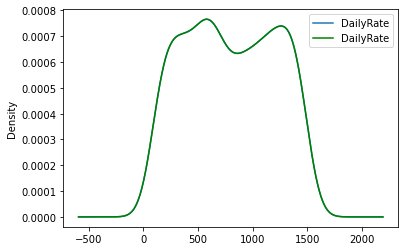

In [18]:
print(df['DailyRate'].std())
print(df['DailyRate_mean'].std())

fig = plt.figure()
ax = fig.add_subplot(111)
df['DailyRate'].plot(kind='kde', ax=ax)
df['DailyRate'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

410.3972881364562
405.0717679629732


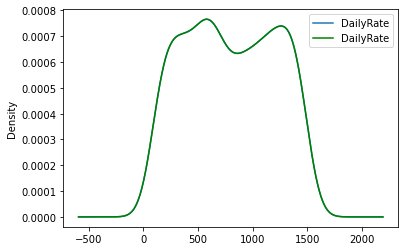

In [19]:
print(df['DailyRate'].std())
print(df['DailyRate_median'].std())

fig = plt.figure()
ax = fig.add_subplot(111)
df['DailyRate'].plot(kind='kde', ax=ax)
df['DailyRate'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [20]:
df['DailyRate']=df['DailyRate'].fillna(df['DailyRate'].mean())

In [21]:
df['DailyRate']

0       1126.000000
1        216.000000
2        337.000000
3       1246.000000
4        994.000000
5       1277.000000
6       1001.000000
7       1230.000000
9        530.000000
10       630.000000
11       793.000000
12       543.000000
13      1091.000000
14      1017.000000
15       625.000000
16       511.000000
17       168.000000
18      1245.000000
19      1138.000000
20       829.000000
21      1130.000000
22       301.000000
25       611.000000
26      1353.000000
27      1376.000000
28       977.000000
30      1229.000000
31       317.000000
33      1243.000000
34      1169.000000
35       932.000000
38      1362.000000
40       942.000000
41       982.000000
42       902.000000
43      1401.000000
44      1319.000000
45       429.000000
46       359.000000
47       430.000000
48       362.000000
49       770.000000
50       390.000000
52      1448.000000
53       832.000000
54       124.000000
55      1278.000000
56       903.000000
58      1082.000000
59      1109.000000


In [22]:
# Finding out the missing values in the Distance From Home column
df[df['DistanceFromHome'].isna()]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate_mean,DailyRate_median
3,50.0,No,Travel_Frequently,1246.000000,Human Resources,NaN,3,Medical,1,644,1,Male,99,3,5,Manager,2,Married,18200,7999,1,Y,No,11,3,3,80,1,32,2,3,32,5,10,7,1246.000000,1246.0
16,34.0,No,Travel_Rarely,511.000000,Sales,NaN,2,Life Sciences,1,1779,4,Female,32,1,2,Sales Executive,4,Single,6029,25353,5,Y,No,12,3,1,80,0,6,3,3,2,2,2,2,511.000000,511.0
20,34.0,No,Travel_Rarely,829.000000,Human Resources,NaN,2,Human Resources,1,847,3,Male,88,3,1,Human Resources,4,Married,3737,2243,0,Y,No,19,3,3,80,1,4,1,1,3,2,0,2,829.000000,829.0
21,34.0,No,Travel_Rarely,1130.000000,Research & Development,NaN,3,Life Sciences,1,1658,4,Female,66,3,2,Research Scientist,2,Divorced,5433,19332,1,Y,No,12,3,3,80,1,11,2,3,11,8,7,9,1130.000000,1130.0
26,24.0,No,Travel_Rarely,1353.000000,Sales,NaN,2,Other,1,128,1,Female,33,3,2,Sales Executive,3,Married,4999,17519,0,Y,No,21,4,1,80,1,4,2,2,3,2,0,2,1353.000000,1353.0
44,46.0,No,Travel_Rarely,1319.000000,Sales,NaN,3,Technical Degree,1,1863,1,Female,45,4,4,Sales Executive,1,Divorced,13225,7739,2,Y,No,12,3,4,80,1,25,5,3,19,17,2,8,1319.000000,1319.0
49,51.0,No,Travel_Rarely,770.000000,Human Resources,NaN,3,Life Sciences,1,1352,3,Male,84,3,4,Manager,2,Divorced,14026,17588,1,Y,Yes,11,3,2,80,1,33,2,3,33,9,0,10,770.000000,770.0
54,37.0,No,Travel_Rarely,124.000000,Research & Development,NaN,3,Other,1,1062,4,Female,35,3,2,Healthcare Representative,2,Single,4107,13848,3,Y,No,15,3,1,80,0,8,3,2,4,3,0,1,124.000000,124.0
68,39.0,Yes,Travel_Rarely,1162.000000,Sales,NaN,2,Medical,1,445,4,Female,41,3,2,Sales Executive,3,Married,5238,17778,4,Y,Yes,18,3,1,80,0,12,3,2,1,0,0,0,1162.000000,1162.0
83,31.0,Yes,Travel_Frequently,561.000000,Research & Development,NaN,3,Life Sciences,1,1537,4,Female,33,3,1,Research Scientist,3,Single,4084,4156,1,Y,No,12,3,1,80,0,7,2,1,7,2,7,7,561.000000,561.0


In [23]:
#Treating the null values in the Distance From Home columnn
df['DistanceFromHome_mean']=df['DistanceFromHome'].fillna(df['DistanceFromHome'].mean())
df['DistanceFromHome_median']=df['DistanceFromHome'].fillna(df['DistanceFromHome'].median())

8.25004333206777
7.8325256683971


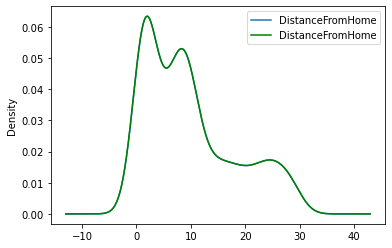

In [24]:
print(df['DistanceFromHome'].std())
print(df['DistanceFromHome_mean'].std())

fig = plt.figure()
ax = fig.add_subplot(111)
df['DistanceFromHome'].plot(kind='kde', ax=ax)
df['DistanceFromHome'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

8.25004333206777
7.848807986069185


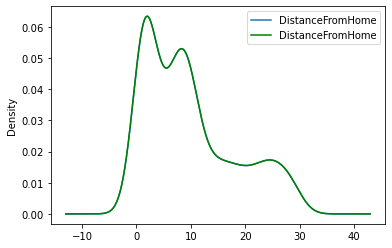

In [25]:
print(df['DistanceFromHome'].std())
print(df['DistanceFromHome_median'].std())

fig = plt.figure()
ax = fig.add_subplot(111)
df['DistanceFromHome'].plot(kind='kde', ax=ax)
df['DistanceFromHome'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [26]:
df['DistanceFromHome']=df['DistanceFromHome'].fillna(df['DistanceFromHome'].median())

In [27]:
df['DistanceFromHome']

0        1.0
1        6.0
2        7.0
3        8.0
4        7.0
5       15.0
6        4.0
7        1.0
9       16.0
10       4.0
11       2.0
12       1.0
13       2.0
14      25.0
15       1.0
16       8.0
17       4.0
18      14.0
19       6.0
20       8.0
21       8.0
22      15.0
25       7.0
26       8.0
27       2.0
28       2.0
30       4.0
31       2.0
33       6.0
34       7.0
35       1.0
38      10.0
40      15.0
41      12.0
42      26.0
43       6.0
44       8.0
45       1.0
46       2.0
47      24.0
48       1.0
49       8.0
50       1.0
52      29.0
53       9.0
54       8.0
55       1.0
56       2.0
58       2.0
59      29.0
60      29.0
61       1.0
62       6.0
63       1.0
64      23.0
65       1.0
66       2.0
67       9.0
68       8.0
71       2.0
72      13.0
73       6.0
74       7.0
75      14.0
76       4.0
77       6.0
78       1.0
79      10.0
80       1.0
82      23.0
83       8.0
84      13.0
85      14.0
86       8.0
87      28.0
88       1.0
89       7.0

In [28]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [29]:
# Changing the data in attrition column from 1 to Yes and 0 to No

# df['Attrition']=df['Attrition'].str.replace('No', '0').str.replace('Yes', '1')
#df['Attrition']

In [72]:
# Checking whether there are any more missing values
df.isnull().sum().sum()

0

In [31]:
#Checking if there are any duplicate values
df.duplicated().sum()

0

## Exploratory Data Analysis

[]

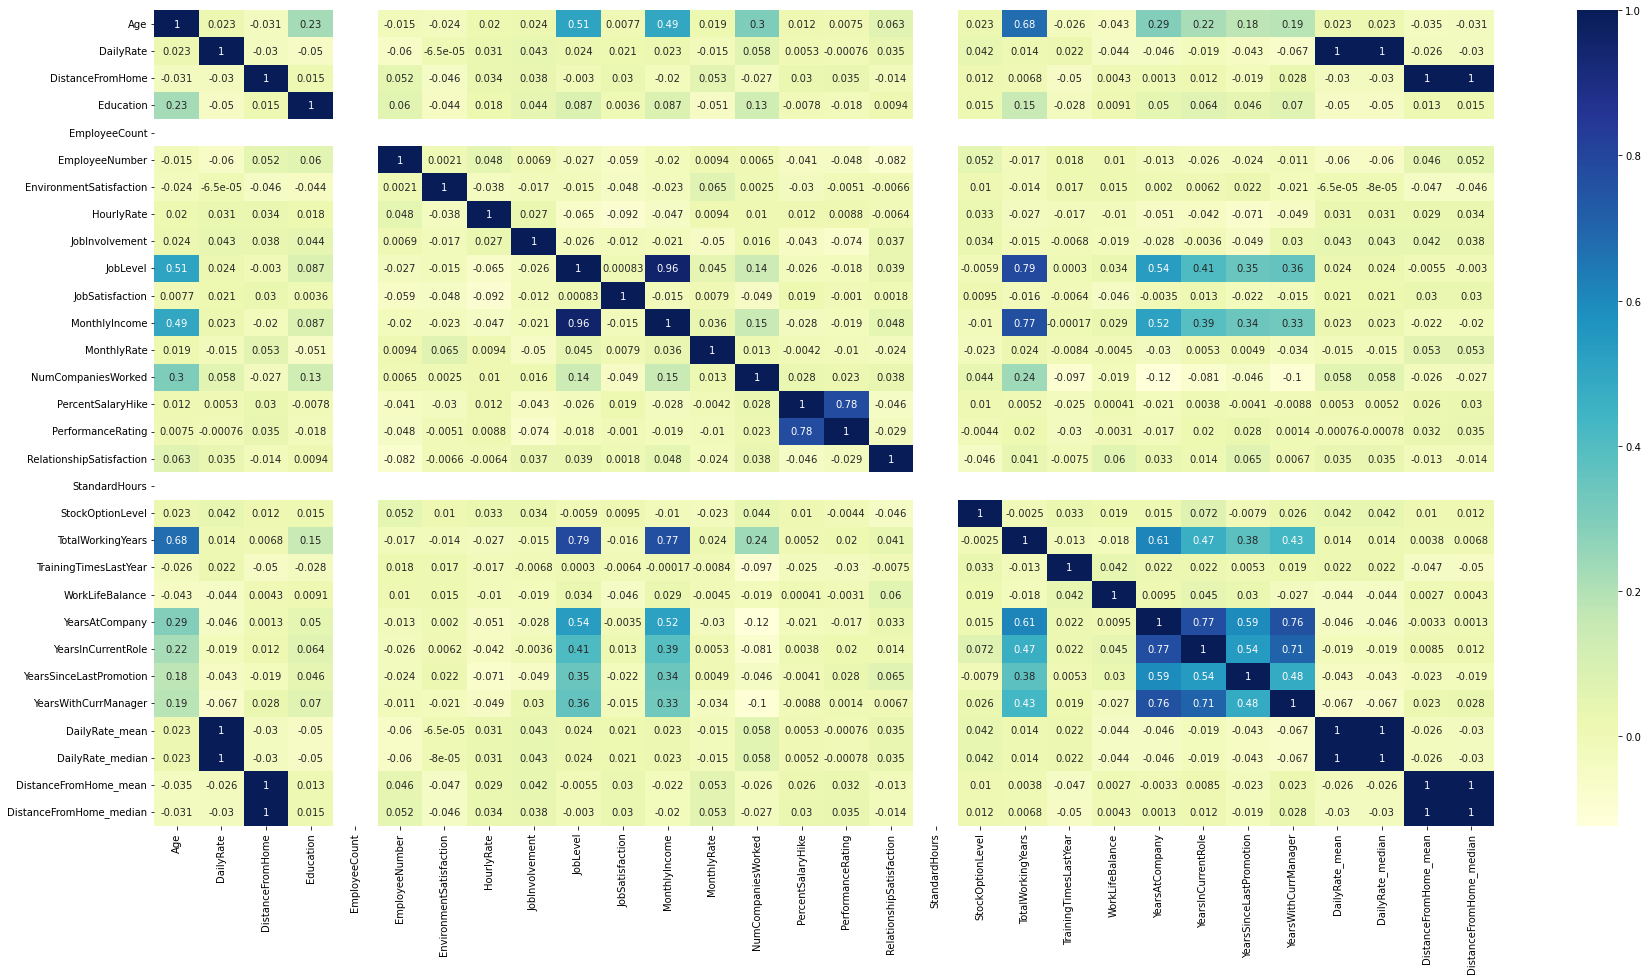

In [32]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.plot()

In [33]:
df.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate_mean,DailyRate_median,DistanceFromHome_mean,DistanceFromHome_median
Age,1.000000,0.023417,-0.030529,0.226646,NaN,-0.014892,-0.024051,0.019754,0.024176,0.506348,0.007670,0.492360,0.018697,0.298354,0.011593,0.007457,0.062533,NaN,0.023282,0.676650,-0.026077,-0.042949,0.291798,0.218028,0.178679,0.186070,0.023417,0.023407,-0.034642,-0.030529
DailyRate,0.023417,1.000000,-0.029675,-0.049839,NaN,-0.059705,-0.000065,0.031238,0.043205,0.024479,0.020811,0.023485,-0.014843,0.058381,0.005259,-0.000757,0.034833,NaN,0.042090,0.014489,0.021673,-0.044359,-0.045800,-0.018887,-0.042946,-0.067282,1.000000,1.000000,-0.026274,-0.029675
DistanceFromHome,-0.030529,-0.029675,1.000000,0.015368,NaN,0.051532,-0.046250,0.034174,0.038000,-0.002992,0.030464,-0.020340,0.052583,-0.026703,0.030099,0.034954,-0.013800,NaN,0.012360,0.006846,-0.050329,0.004283,0.001272,0.011970,-0.018963,0.027970,-0.029675,-0.029685,0.997926,1.000000
Education,0.226646,-0.049839,0.015368,1.000000,NaN,0.059715,-0.043934,0.017693,0.044439,0.087166,0.003588,0.086731,-0.051430,0.125570,-0.007788,-0.017577,0.009436,NaN,0.014845,0.149303,-0.027540,0.009113,0.050400,0.063872,0.045594,0.069682,-0.049839,-0.049842,0.013227,0.015368
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.014892,-0.059705,0.051532,0.059715,NaN,1.000000,0.002105,0.048078,0.006881,-0.027236,-0.058772,-0.020126,0.009380,0.006537,-0.040627,-0.048100,-0.081763,NaN,0.052096,-0.016776,0.017740,0.010338,-0.013257,-0.025789,-0.023922,-0.010660,-0.059705,-0.059732,0.046446,0.051532
EnvironmentSatisfaction,-0.024051,-0.000065,-0.046250,-0.043934,NaN,0.002105,1.000000,-0.038039,-0.016617,-0.014904,-0.048183,-0.022766,0.064643,0.002533,-0.029546,-0.005104,-0.006639,NaN,0.010118,-0.014218,0.017177,0.015347,0.002020,0.006233,0.022063,-0.021479,-0.000065,-0.000080,-0.047095,-0.046250
HourlyRate,0.019754,0.031238,0.034174,0.017693,NaN,0.048078,-0.038039,1.000000,0.026503,-0.064574,-0.092036,-0.046899,0.009415,0.010424,0.011554,0.008755,-0.006443,NaN,0.032976,-0.027162,-0.016910,-0.010398,-0.050932,-0.042411,-0.070631,-0.049087,0.031238,0.031198,0.028854,0.034174
JobInvolvement,0.024176,0.043205,0.038000,0.044439,NaN,0.006881,-0.016617,0.026503,1.000000,-0.026446,-0.011578,-0.021133,-0.050058,0.016475,-0.042630,-0.073843,0.037272,NaN,0.034040,-0.015257,-0.006825,-0.018784,-0.028381,-0.003600,-0.048588,0.029750,0.043205,0.043235,0.041766,0.038000
JobLevel,0.506348,0.024479,-0.002992,0.087166,NaN,-0.027236,-0.014904,-0.064574,-0.026446,1.000000,0.000829,0.955056,0.044598,0.138903,-0.026289,-0.018354,0.039099,NaN,-0.005899,0.786444,0.000298,0.034424,0.536371,0.408533,0.348616,0.358741,0.024479,0.024480,-0.005465,-0.002992


__DISTRIBUTION OF EMPLOYEE ATTRITION IN THE COMPANY__

In [34]:
attrition_count= pd.DataFrame(df["Attrition"].value_counts())
attrition_count

,Attrition
No,748
Yes,145


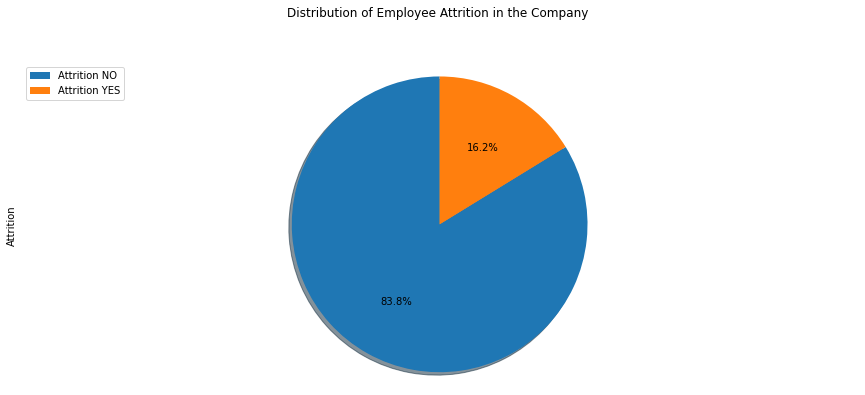

In [35]:
labels = 'Attrition NO','Attrition YES'
df['Attrition'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Employee Attrition in the Company ', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

__From the Pie Chart, we can infer that out of 1029 employees, 16.2% of the employees left their job 
due to some reasons whereas other 83.8% of the employees preferred to continue their job at the company.__

__Removing Useless Features__

StandardHours <BR>
EmployeeCount <BR>
Over18 <br>
EmployeeNumber <br>
StockOptionLevel <br>

In [36]:
# removing the unnecessary columns

df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'],inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate_mean,DailyRate_median,DistanceFromHome_mean,DistanceFromHome_median
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,32,1,2,5,4,1,3,1126.0,1126.0,1.00000,1.0
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,7,0,3,3,2,0,1,216.0,216.0,6.00000,6.0
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,1,3,3,1,0,1,0,337.0,337.0,7.00000,7.0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,8.0,3,Medical,1,Male,99,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,32,2,3,32,5,10,7,1246.0,1246.0,9.69441,8.0
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,18,4,3,8,6,4,0,994.0,994.0,7.00000,7.0


In [37]:
df.shape

(893, 34)

__Analysis of the Rating Features__

* JobSatisfaction <br>
* EnvironmentSatisfaction <br>
* RelationshipSatisfaction <br> 
* JobInvolvement  <br>
* WorkLifeBalance  <br>
* PerformanceRating  <br>

In [38]:
df['JobSatisfaction'].value_counts()

4    277
3    256
2    191
1    169
Name: JobSatisfaction, dtype: int64

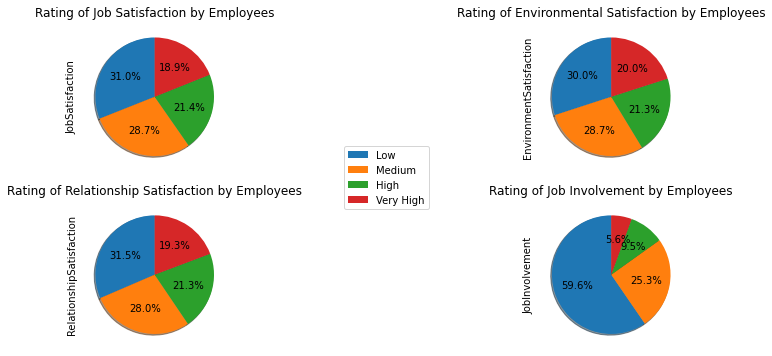

In [39]:
fig = plt.figure() 


ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222)  
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224)  

labels = 'Low','Medium','High','Very High'


df['JobSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax1) # add to subplot 2
ax1.set_title ('Rating of Job Satisfaction by Employees')
fig.legend(labels=labels,loc='center')

df['EnvironmentSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax2) 
ax2.set_title('Rating of Environmental Satisfaction by Employees')

df['RelationshipSatisfaction'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax3)
ax3.set_title('Rating of Relationship Satisfaction by Employees')

df['JobInvolvement'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax4) 
ax4.set_title('Rating of Job Involvement by Employees')

plt.show()

__From the subplot, we can infer that more than 60% of the employees are :__

* Not Satisfied in their Job
* Not Satisfied with their Work Environmnet
* Not Satisfied in their Relationship
* Not Getting involved in their job

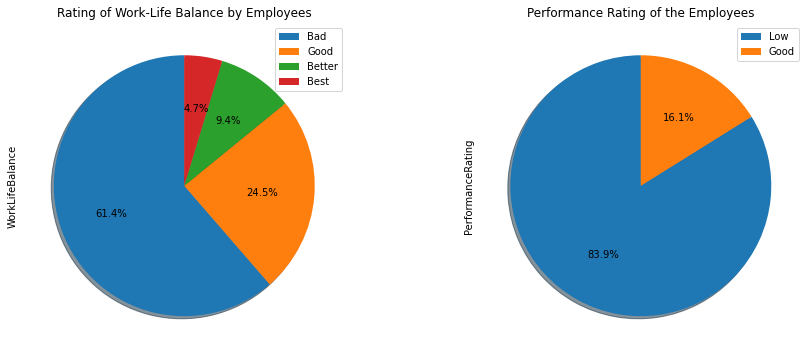

In [40]:
fig2 = plt.figure() 

ax5 = fig2.add_subplot(121) 
ax6 = fig2.add_subplot(122)  
  
labels_list1 = 'Bad','Good','Better','Best' 
labels_list2 = 'Low','Good','Excellent','Outstanding'

df['WorkLifeBalance'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax5) # add to subplot 2
ax5.set_title ('Rating of Work-Life Balance by Employees')
ax5.legend(labels=labels_list1,loc='upper right')

df['PerformanceRating'].astype(str).value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,ax=ax6) 
ax6.set_title('Performance Rating of the Employees')
ax6.legend(labels=labels_list2,loc='upper right')

plt.show()

__From the above piecharts, we can see that:__

* Almost 60% of the employees have rated their Work-life Balance as Bad
* Almost 85% of the employees have a low performance rating

### Analysis of Business Travel Feature

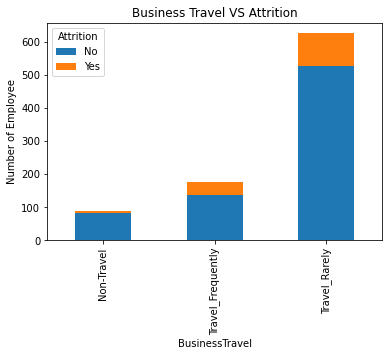

In [41]:
props = df.groupby("BusinessTravel")['Attrition'].value_counts(normalize=False).unstack()

props.plot(kind='bar', alpha=1, stacked='False')

plt.title('Business Travel VS Attrition')
plt.ylabel('Number of Employee')
plt.show()

__From the above data it is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently.__

__Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the Employees' business travel interest__

__Analysis of Work Experience__

* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* YearsWithCurrManager
* TotalWorkingYears

In [42]:
we = df[['YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'TotalWorkingYears', 'Attrition']]
we.head()

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,TotalWorkingYears,Attrition
0,5,4,1,3,32,No
1,3,2,0,1,7,No
2,1,0,1,0,1,Yes
3,32,5,10,7,32,No
4,8,6,4,0,18,No


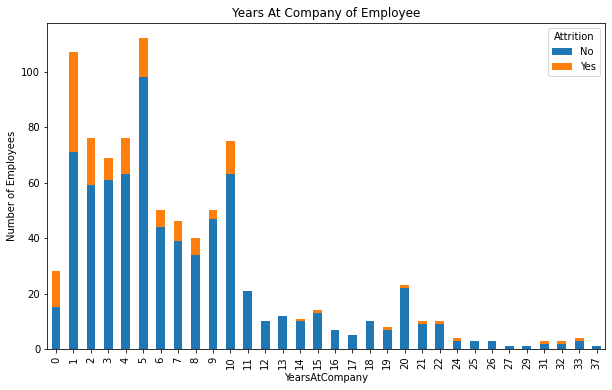

In [43]:
yac = df.groupby("YearsAtCompany")['Attrition'].value_counts(normalize=False).unstack()

yac.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years At Company of Employee')
plt.ylabel('Number of Employees')
plt.show()

__It is observed that the newly arriving employees quit their jobs most,so more concern should be given to the freshers and their cause of leaving the company should be figured out.__

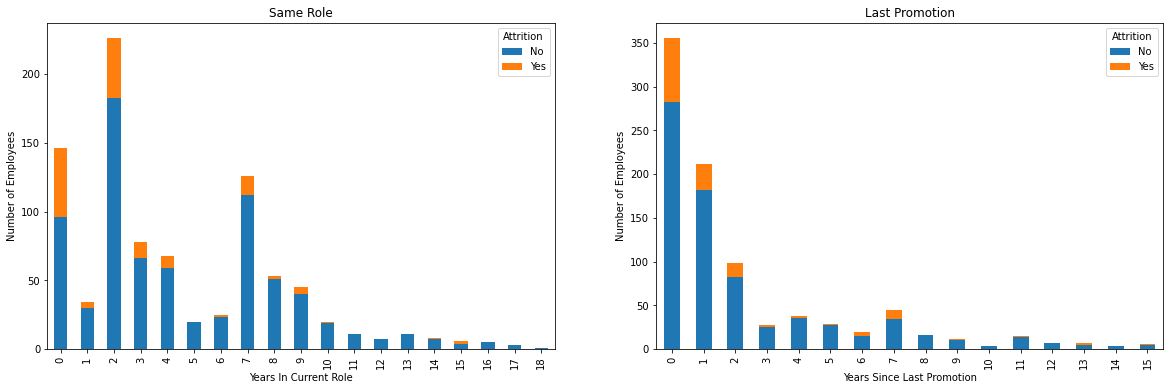

In [44]:
ycr = df.groupby("YearsInCurrentRole")['Attrition'].value_counts(normalize=False).unstack()
ysp = df.groupby("YearsSinceLastPromotion")['Attrition'].value_counts(normalize=False).unstack()


fig = plt.figure() # create figure

ax0 = fig.add_subplot(121) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(122) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

# Subplot 1: Box plot
ycr.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax0) # add to subplot 1
ax0.set_title('Same Role')
ax0.set_xlabel('Years In Current Role')
ax0.set_ylabel('Number of Employees')

# Subplot 2: Line plot
ysp.plot(kind='bar', stacked='False',figsize=(20,6), ax=ax1) # add to subplot 2
ax1.set_title ('Last Promotion')
ax1.set_ylabel('Number of Employees')
ax1.set_xlabel('Years Since Last Promotion')

plt.show()


__From the above two plots, it is very clear that Employees who are in same post or not getting promoted tend to leave the company most. It is a major concern, since experienced Employees quiting their jobs would affect the company most.__

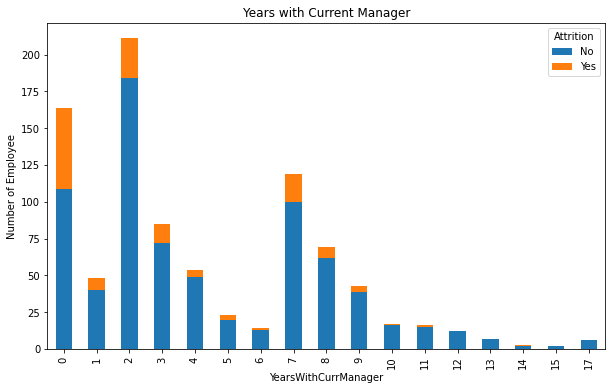

In [45]:
ycm = df.groupby("YearsWithCurrManager")['Attrition'].value_counts(normalize=False).unstack()

ycm.plot(kind='bar', stacked='False',figsize=(10,6))

plt.title('Years with Current Manager')
plt.ylabel('Number of Employee')
plt.show()

__It is clear that in the starting of relation of Manager and Employee's are not so happy. It is important that the Manager communication with the employee from the starting itself trying to understand them soon to reduce the increase in Attrition__

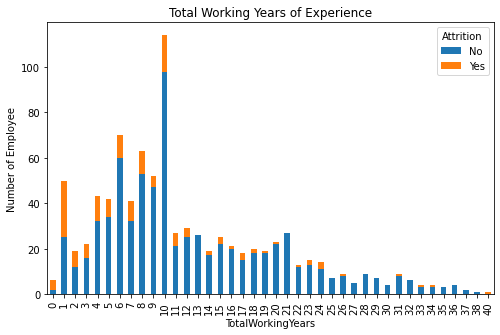

In [46]:
twy = df.groupby("TotalWorkingYears")['Attrition'].value_counts(normalize=False).unstack()

twy.plot(kind='bar', stacked='False',figsize=(8,5))

plt.title('Total Working Years of Experience')
plt.ylabel('Number of Employee')
plt.show()

__It is observed that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start.__

### Analysis of Monthly Income


In [47]:
mi = df[df['Attrition']=='Yes']['MonthlyIncome']
mi = mi.reset_index()
mi.drop(['index'], axis=1, inplace=True)


mn = df[df['Attrition']=='No']['MonthlyIncome']
mn = mn.reset_index()
mn.drop(['index'], axis=1, inplace=True)

mi['mn'] = mn
mi.rename(columns={'MonthlyIncome':'Yes', 'mn':'No'}, inplace=True)
mi.head()

,Yes,No
0,2679,17399
1,13610,4941
2,2313,18200
3,10609,10445
4,1601,10333


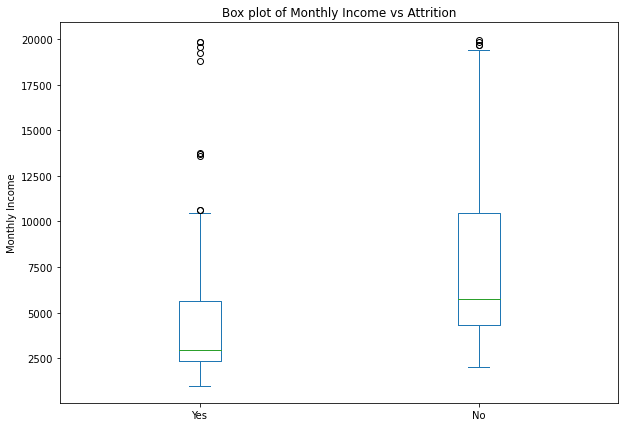

In [48]:
mi.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Monthly Income vs Attrition')
plt.ylabel('Monthly Income')

plt.show()

__Employees who left their jobs tend to have low average monthly income than those who continued their job in the company.__

### Over Time Employee Analysis


<AxesSubplot:ylabel='Frequency'>

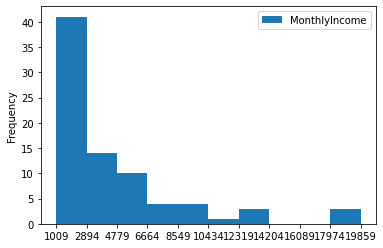

In [49]:
dot = df[['OverTime', 'MonthlyIncome', 'Attrition']]
oyay = dot[(df['OverTime']=='Yes') & (df['Attrition']=='Yes')]
oyay = oyay.sort_values(by = 'MonthlyIncome', ascending=False, axis=0) #sorting to get the top values
count, bin_edges = np.histogram(oyay['MonthlyIncome'])

oyay.plot(kind='hist', xticks=bin_edges)

<AxesSubplot:ylabel='Frequency'>

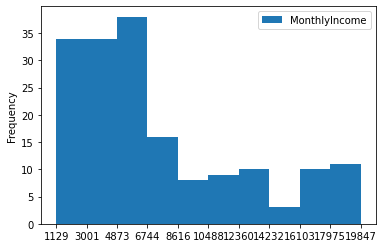

In [50]:
oyan = dot[(df['OverTime']=='Yes') & (df['Attrition']=='No')]
count, bin_edges = np.histogram(oyan['MonthlyIncome'])

oyan.plot(kind='hist', xticks=bin_edges)

<AxesSubplot:ylabel='Frequency'>

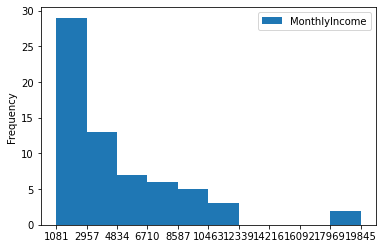

In [51]:
onay = dot[(df['OverTime']=='No') & (df['Attrition']=='Yes')]
count, bin_edges = np.histogram(onay['MonthlyIncome'])

onay.plot(kind='hist', xticks=bin_edges)

<AxesSubplot:ylabel='Frequency'>

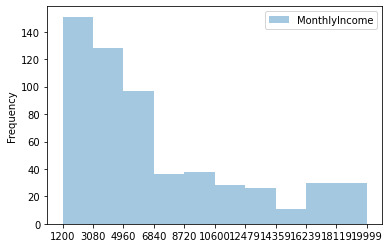

In [52]:
onan = dot[(df['OverTime']=='No') & (df['Attrition']=='No')]
count, bin_edges = np.histogram(onan['MonthlyIncome'])

onan.plot(kind='hist',alpha =0.4, xticks=bin_edges)

__Based on the Monthly income we can see the data distribution by permutation and combination of the Yes and No values from OVERTIME and ATTRITION columns.__

### Analysis on Department

In [53]:
dpt = df[['Department','Attrition']]
dpt.head()

,Department,Attrition
0,Research & Development,No
1,Research & Development,No
2,Sales,Yes
3,Human Resources,No
4,Research & Development,No


In [54]:
dpt['Department'].value_counts()


Research & Development    587
Sales                     270
Human Resources            36
Name: Department, dtype: int64

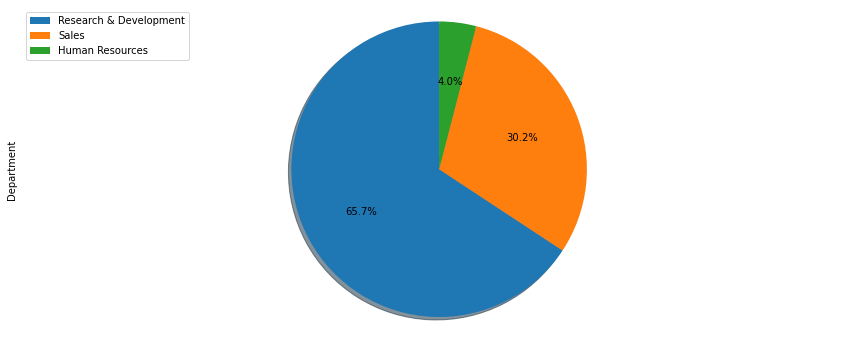

In [55]:
dpt['Department'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=dpt['Department'].unique(), loc='upper left') 


So, we can see the number of employees in the Research and development department is the highest.

In [56]:
dpm = df.groupby("Department")['Attrition'].value_counts(normalize=False).unstack()
dpm = dpm.transpose()
dpm

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,29,506,213
Yes,7,81,57


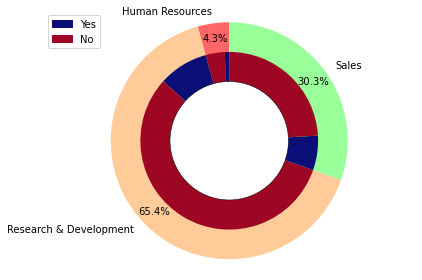

In [57]:
labels = ['Human Resources', 'Research & Development', 'Sales',]
sizes = [63, 961, 446]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [12,51,133,828,92,354]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723', '#0a0e77','#9e0723']
 
# Plot
plt.pie(sizes, autopct='%1.1f%%', pctdistance=.87, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#0a0e77', label='Yes')
pin = mpatches.Patch(color='#9e0723', label='No')
plt.legend(handles=[pur, pin], loc='upper left')

plt.axis('equal')
plt.tight_layout()
plt.show()

__Based on this plot we can say that in the R&D department the attrition rate is the highest.__

### Analysing Gender


In [58]:
gda = df[['Gender', 'DistanceFromHome', 'Attrition']]
gda.head()


,Gender,DistanceFromHome,Attrition
0,Male,1.0,No
1,Male,6.0,No
2,Male,7.0,Yes
3,Male,8.0,No
4,Male,7.0,No


In [59]:
gda['Gender'].value_counts()


Male      523
Female    370
Name: Gender, dtype: int64

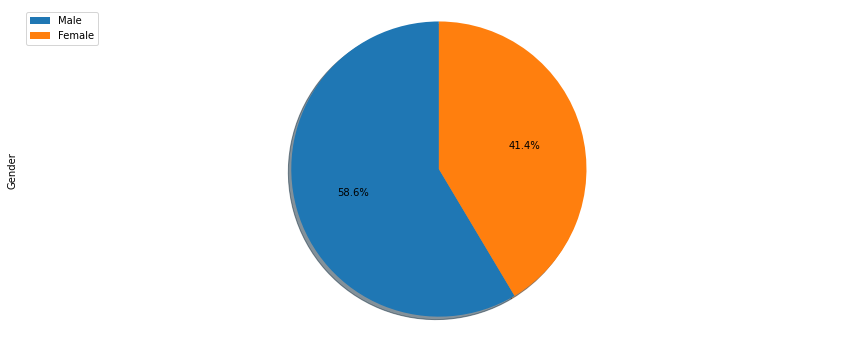

In [60]:
gda['Gender'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Male', 'Female'], loc='upper left') 

From the above plot we can say the number of male employees are higher than that of the female employees.

In [61]:
fma = gda.groupby("Gender")['Attrition'].value_counts(normalize=False).unstack()
fma = fma.transpose()
fma

Gender,Female,Male
Attrition,,
No,314,434
Yes,56,89


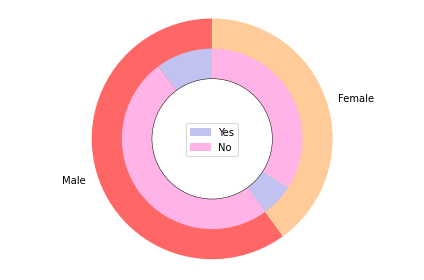

In [62]:
labels = ['Male', 'Female']
sizes = [882,588]
labels_attrition = ['Yes','No','Yes','No']
sizes_attrition = [150,732,87,501]
colors = ['#ff6666', '#ffcc99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

__From this pie plot we can infer that somehow since the number of male employees are higher, the attrituion rate is also higher in amles as compared to the females.__

### Analysis of Marital Status

In [63]:
ms = df[['MaritalStatus', 'Attrition']]
ms.head()

,MaritalStatus,Attrition
0,Divorced,No
1,Divorced,No
2,Single,Yes
3,Married,No
4,Single,No


In [64]:
ms['MaritalStatus'].value_counts()


Married     411
Single      276
Divorced    206
Name: MaritalStatus, dtype: int64

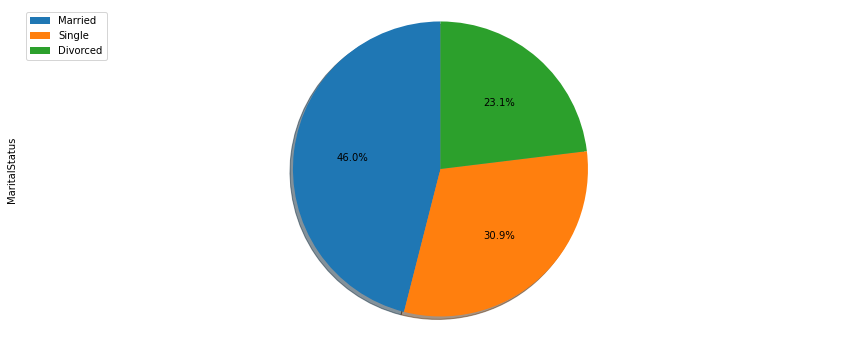

In [65]:
ms['MaritalStatus'].value_counts().plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None)   
plt.axis('equal') 
plt.legend(labels=['Married', 'Single', 'Divorced'], loc='upper left') 

The number of married employees are higher.

In [66]:
msa = ms.groupby("MaritalStatus")['Attrition'].value_counts(normalize=False).unstack()
msa = msa.transpose()
msa

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,193,359,196
Yes,13,52,80


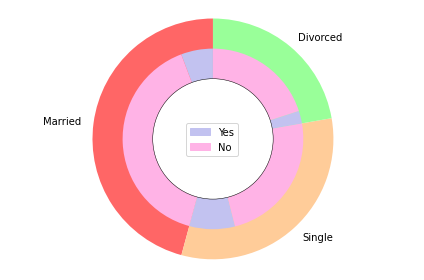

In [67]:
labels = ['Married', 'Single', 'Divorced']
sizes = [673, 470, 327]
labels_attrition = ['Yes','No','Yes','No','Yes','No']
sizes_attrition = [84,589,120,350,33,294]
colors = ['#ff6666', '#ffcc99', '#99ff99']

colors_attrition = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(sizes, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(sizes_attrition,colors=colors_attrition,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0.5)
fig6 = plt.gcf()
fig6.gca().add_artist(centre_circle)

#legend
import matplotlib.patches as mpatches
pur = mpatches.Patch(color='#c2c2f0', label='Yes')
pin = mpatches.Patch(color='#ffb3e6', label='No')
plt.legend(handles=[pur, pin], loc='center')

plt.axis('equal')
plt.tight_layout()
plt.show()

__After we plot we infer that, the attrition rate is higher among the single employees.__

### Analysing monthly income by gender.

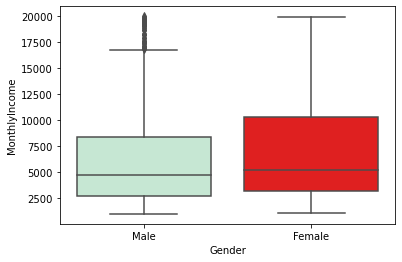

In [68]:
ax = sns.boxplot(x="Gender",y='MonthlyIncome',data=df,palette={"Female":"red","Male":"#C0EDD2"})
plt.show()

__We can see there is no significant difference between themonthly income of the two genders.__

In [69]:
df.pivot_table('MonthlyIncome',index="JobRole",columns="Gender")


Gender,Female,Male
JobRole,,
Healthcare Representative,7271.230769,7608.469388
Human Resources,3839.833333,4090.181818
Laboratory Technician,3055.423077,3193.397849
Manager,16941.526316,17361.617647
Manufacturing Director,7892.300000,6842.000000
Research Director,15138.225806,16740.806452
Research Scientist,3395.246575,3015.526786
Sales Executive,6741.086420,7379.838095
Sales Representative,2687.043478,2662.424242


### __Analysing the salaries, years of service and satisfaction levels of the employees on the basis of their attrition rates:-__

We'll make a graph that reflects salaries, years worked in the company, satisfaction level and the attrition rate:-

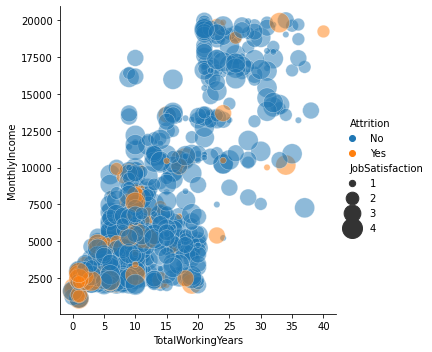

In [85]:
ax=sns.relplot(x='TotalWorkingYears', y='MonthlyIncome', hue='Attrition', size='JobSatisfaction',
            sizes=(40, 400), alpha=.5, palette="muted",
            height=5, data=df)
plt.show()

__We can notice various things here, like:__

* After 20 years of work in the company there is a significant salary increase.

* The degree of satisfaction is fairly evenly distributed, so we will have to look at it in more detail.

* The vast majority of workers seem to be between $10,000 and 20 years of service

* The $10,000 salary seems to be a good indicator in this respect to the attrition rate, since above it seems that there isless

# INSIGHTS

1.  We infer that out of 1029 employees, 17.1% of the employees left their job due to some reasons whereas other 82.9% of the employees preferred to continue their job at the company.

2. We can infer that more than 60% of the employees are :
 * Not Satisfied in their Job
 * Not Satisfied with their Work Environmnet
 * Not Satisfied in their Relationship
 * Not Getting involved in their job

3. We can see that:

 * Almost 60% of the employees have rated their Work-life Balance as Bad
 * Almost 85% of the employees have a low performance rating
 
4. It is clear that Employees who travel rarely have more attrition rate followed by Employees who travel frequently. Best way to reduce this attrition is to conduct monthly survey and to assign travel according to the Employees' business travel interests.

5. It is observed that the newly arriving employees quit their jobs most,so more concern should be given to the freshers and their cause of leaving the company should be figured out.

6. It is very clear that Employees who are in same post or not getting promoted tend to leave the company most. It is a major concern, since experienced Employees quiting their jobs would affect the company most.

7. It is clear that in the starting of relation of Manager and Employee's are not so happy. It is important that the Manager communication with the employee from the starting itself trying to understand them soon to reduce the increase in Attrition.

8. It is observed that freshers leave the company very likely so it's important that company creates a new policy to handle freshers so they don't leave the company from the start.

9. Employees who left their jobs tend to have low average monthly income than those who continued their job in the company.

10. Based on the Monthly income we can see the data distribution by permutation and combination of the Yes and No values from OVERTIME and ATTRITION columns.

11. We can see the number of employees in the Research and development department is the highest.

12. We can also say that in the R&D department the attrition rate is the highest.

13. The number of male employees are higher than that of the female employees.

14. We can infer that somehow since the number of male employees are higher, the attrituion rate is also higher in amles as compared to the females.

15. The number of married employees are higher.

16. We infer that, the attrition rate is higher among the single employees.

17. We can see there is no significant difference between themonthly income of the two genders.



In [71]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate_mean,DailyRate_median,DistanceFromHome_mean,DistanceFromHome_median
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,4,Male,66,3,4,Research Director,4,Divorced,17399,6615,9,No,22,4,3,32,1,2,5,4,1,3,1126.0,1126.0,1.00000,1.0
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,2,Male,84,3,2,Manufacturing Director,2,Divorced,4941,2819,6,No,20,4,4,7,0,3,3,2,0,1,216.0,216.0,6.00000,6.0
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,2,Male,31,3,1,Sales Representative,2,Single,2679,4567,1,No,13,3,2,1,3,3,1,0,1,0,337.0,337.0,7.00000,7.0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,8.0,3,Medical,1,Male,99,3,5,Manager,2,Married,18200,7999,1,No,11,3,3,32,2,3,32,5,10,7,1246.0,1246.0,9.69441,8.0
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,2,Male,87,3,3,Healthcare Representative,2,Single,10445,15322,7,No,19,3,4,18,4,3,8,6,4,0,994.0,994.0,7.00000,7.0


In [83]:
df.to_excel('Employee_attrition_EDA.xlsx',index=False)

## EMPLOYEE ATTRITION DASHBOARD LINK:- 

https://public.tableau.com/app/profile/ahiri.mukherjee/viz/Employee_attritionEDA/EMPLOYEEATTRITIONDASHBOARD?publish=yes 